# Asset Pricing Model

## Homework 4

### Kernel Density Estimation & Quantile quantile(QQ) Plot

#### 20121229 Jun Pyo Park

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
import numpy as np
import pandas as pd
import scipy.stats as stats

## Function plot_kernel_density : calcuating kernel density function

In [212]:
def plot_kernel_density(min_x, max_x, bin_length, data):
    
    num_hist = int((max_x - min_x) / bin_length) + 2
    initial_point = min_x - bin_length/2
    end_point = max_x + bin_length/2
    row_index = np.linspace(initial_point, end_point, num_hist)
    m = len(data)
    data = pd.Series(data)
    kernel_density = pd.Series(index = row_index)
    kernel_density.iloc[0] = len(data.where(data < min_x).dropna()) / m / bin_length # first bin
    kernel_density.iloc[-1] = len(data.where(max_x <= data).dropna()) / m / bin_length # last bin
    for i in range(num_hist-2): # other bins
        start = min_x + i * bin_length
        a = data.where(start <= data).dropna()
        a = a.where(data < start + bin_length)
        kernel_density.iloc[i+1] = len(a.dropna()) / m / bin_length
        
    return kernel_density, row_index

Test for randn data set (M=1000)

In [214]:
data = np.random.randn(1000)
print(data[:5])

[-1.47657724  0.35685345 -0.54385977 -1.23443159 -1.64971538]


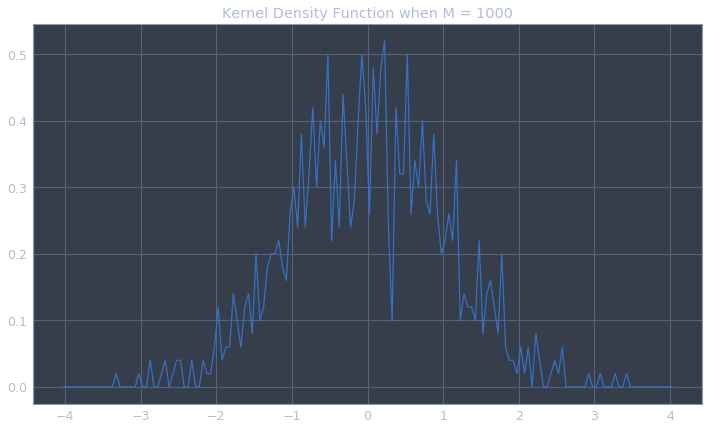

In [215]:
d = plot_kernel_density(-4,4,0.05,data)
plt.figure(figsize=(12,7))
plt.plot(d[0])
plt.title("Kernel Density Function when M = " + str(len(data)))
plt.show()

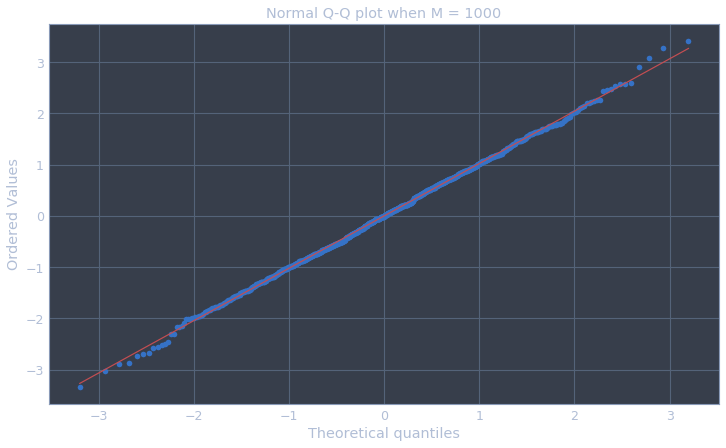

In [217]:
plt.figure(figsize=(12,7))
# Q-Q plot generating for test data set
stats.probplot(data, dist="norm", plot=plt)
plt.title("Normal Q-Q plot when M = " + str(len(data)))
plt.show()

## Graph Generating Function

In [218]:
# Function get_random_plot : making one sample graph for input parameters
def get_random_plot(S_0, mu, sigma, dt, time_line):
    s = []
    s.append(S_0)
    k = len(time_line)
    for i in range(1,k):
        s.append(s[i-1] * np.exp( (mu-0.5 * sigma ** 2) * dt + sigma * dt ** 0.5 * np.random.randn()))
    return pd.Series(s, index = time_line)

Setting the Parameters

In [219]:
S_0 = 1
mu = 0.05
sigma = 0.5
T_0 = 0 # starting time point
T = 1 # End of time point
L = 100 # number of time_step interval
time_line = np.linspace(T_0,T,L)
dt = (T - T_0) / L # unit size of time_step interval
print(dt)

0.01


## Make the iteration function

In [220]:
def iteration(iter_num):
    sample_table = pd.DataFrame()
    plt.figure(figsize=(12,7))
    # Plot M sample graphs
    for j in range(iter_num):
        sample_graph = get_random_plot(S_0, mu, sigma, dt, time_line)
        sample_table['graph' + str(j+1)] = sample_graph
        fig = plt.plot(sample_graph)
    plt.title("Sample Graphs when M = " + str(iter_num))
    plt.show()
    
    # Plot a Kernel Density for stock price at time T
    data = sample_table.iloc[-1] # iloc[-1] means 'at time T'
    
    # Set the interval to min and max value, and bin = 0.05
    kernel_density = plot_kernel_density(data.min(),data.max(),0.05,data)
    plt.figure(figsize=(12,7))
    plt.plot(kernel_density[0])
    plt.title("Kernel Density Function when M = " + str(iter_num))
        
    # Plot lognormal function
    x = kernel_density[1] # get the x-axis
    x = x[np.where(x>0)] # otherwise log(x) is not defined
    
    # We should change mu and sigma for the lognormal distribution parameters
    log_mu = (mu-sigma**2 * 0.5) * T
    log_sigma = sigma * T ** 0.5
    # Plot lognormal density function on x_axis
    pdf = (np.exp(-(np.log(x) - log_mu)**2 / (2 * log_sigma**2)) / (x * log_sigma * np.sqrt(2 * np.pi)))
    plt.plot(x,pdf)
    plt.show()
    
    # Generating QQ plot
    plt.figure(figsize=(12,7))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot when M = " + str(iter_num))
    plt.show() 

Why we use log_mu and log_sigma?
- Lognormal distribution's mu and sigma is different from given parameter mu and sigma

<img src="https://trello-attachments.s3.amazonaws.com/59103d52b56a24582f00dc97/5ac7a2755d2cdc2ab8a65e67/0025f67a67cf2791d2035df9cd6bc603/image.png"></img>

## Case 1. M = 50

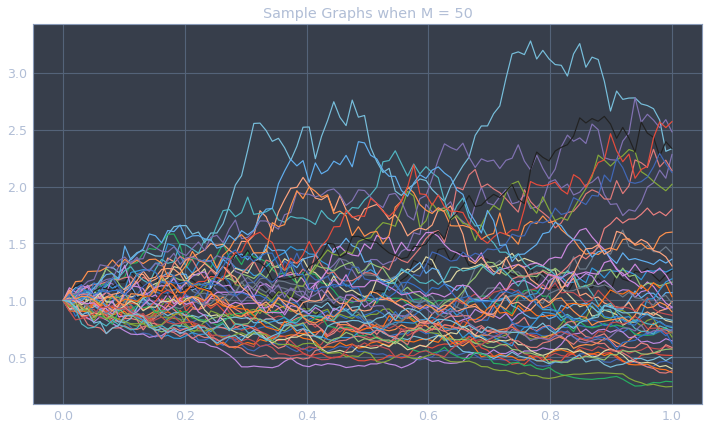

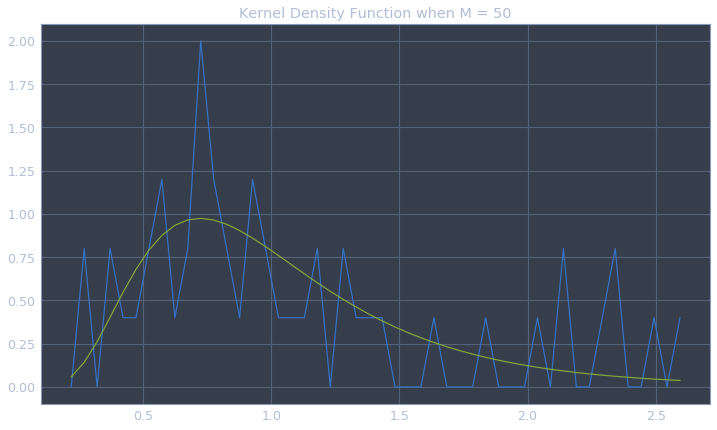

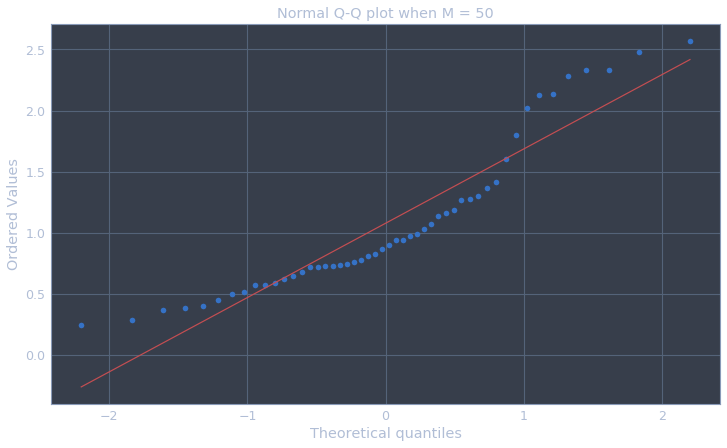

In [222]:
iteration(50) # M = 50

## Case 2. M = 100

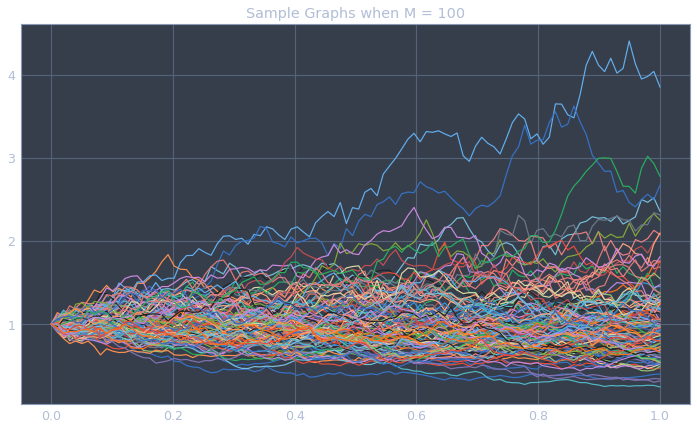

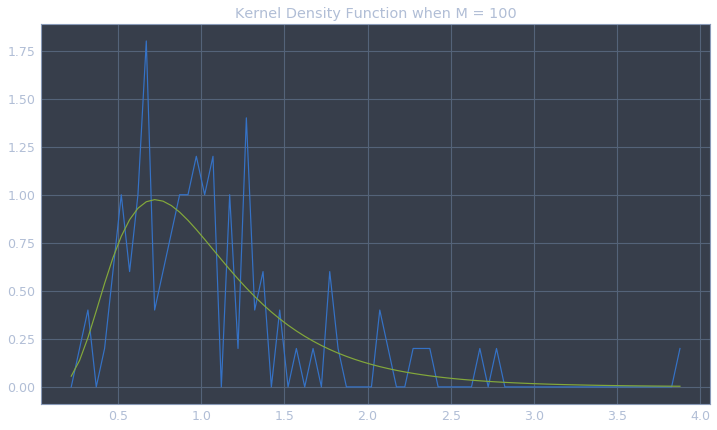

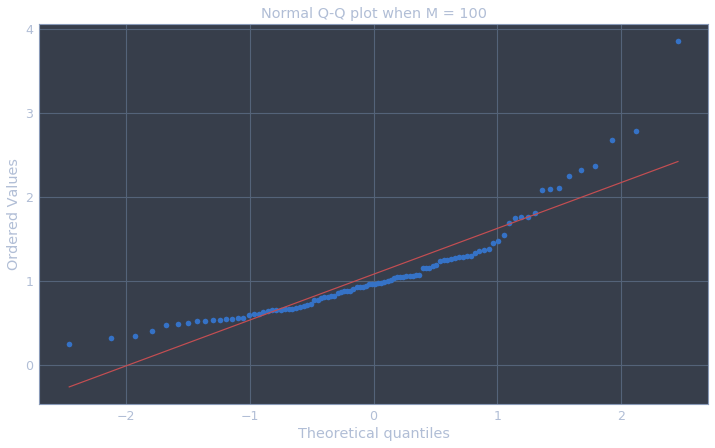

In [230]:
iteration(100) # M = 100

# Case 3. M = 1000

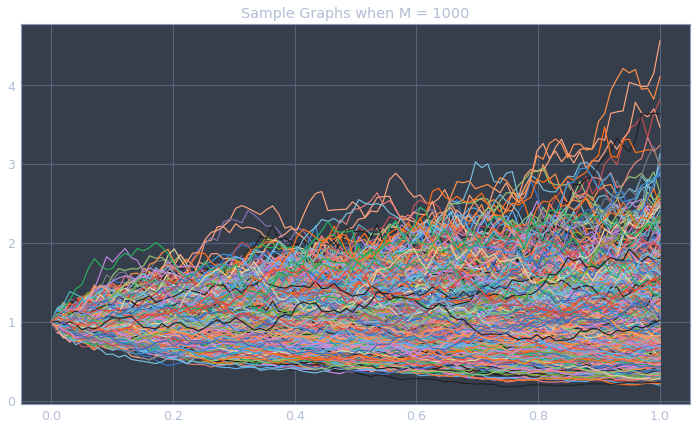

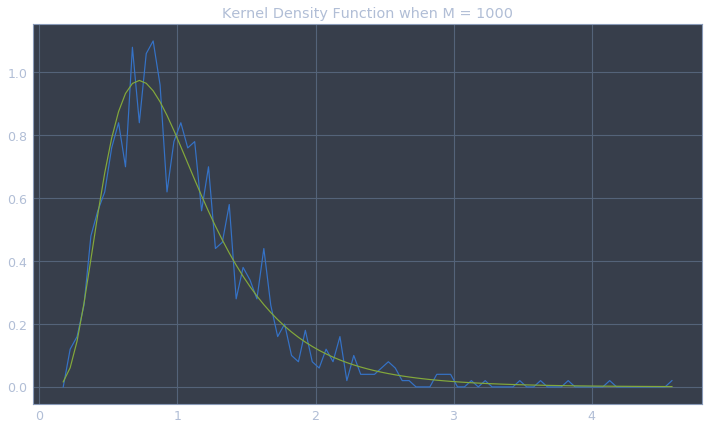

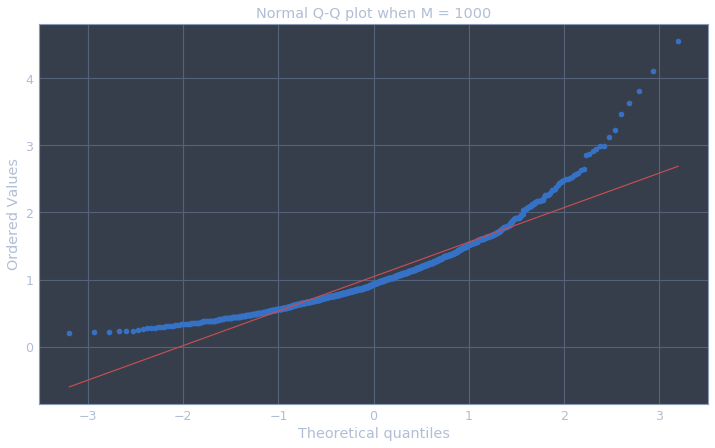

In [226]:
iteration(1000) # M = 1000